# Logistic regression to recognize handwritten digits


### Files preparation

Here, we will use gradyscale images of mnist dataset that contains images of hand written single digits which contains 10 different classes. More Description of the data is available and can be downloaded from below:

Training set

https://www.dropbox.com/scl/fo/rbclih463v71w6gudlctr/AEol0xdFwoubUeKlA_AZdu4?rlkey=06bdrrd9pmb4mn3csv8w8bsgb&dl=0

Testing images
https://www.dropbox.com/scl/fo/9pz4tyvbbtokgoftol3d5/ABUKSCMUV3xHDHKA-hDNCaw?rlkey=y5b6xf3eo8yaksxqx0dqlwwk1&dl=0


To run this code, all training and testing images should be in the folder `'mnist-train-images-tiff'` and `'mnist-test-images-tiff'`, respectively.

Also you will need two csv files 

'mnist-train-labels.csv' 

https://www.dropbox.com/scl/fi/tbijfsy8yiznnrwsdjbvb/mnist-train-labels.csv?rlkey=pgns5m2dp6hxyne1tx5y54tg0&dl=0

and 'mnist-test-labels.csv' 

https://www.dropbox.com/scl/fi/u67lumxn2e8zjoql1xqdc/mnist-test-labels.csv?rlkey=q441aypbidt0r6xm5rxh701wq&dl=0


that contain the class labels of the trainingand testing images, respectively. There are two columns in the csv file. The first column is the class label and the second column is the name of the image file. Since, we will be dealing with numpy matrices, always make the class labels numeric.




The actual images of the hand-written digits have to be transformed into row vectors. The pixel values will serve as features or predictors.

### Load Class labels

Read the files containing class labels and file names in Pandas DataFrame. First Column in the data frame is `class` and second column is `file`

In [1]:
import pandas as pd
train_class=pd.read_csv('mnist-train-labels.csv',header=None,names=['class','file'])
train_class.head()

test_class=pd.read_csv('mnist-test-labels.csv',header=None,names=['class','file'])
test_class.head()

,class,file
0,7,00001.tif
1,2,00002.tif
2,1,00003.tif
3,0,00004.tif
4,4,00005.tif


In [2]:
'''
To access class label for a specific image file
'''
test_class.loc[train_class['file'] == '00001.tif','class'].item()

7

### Load training and testing images

In [3]:
from os import listdir
from skimage import io
imagedir='mnist-train-images-tiff/mnist-train-images-tiff/'
files=listdir(imagedir)
import numpy as np
#creating numpy matrix to store the images
x_train = np.empty(shape=(len(files),28,28),dtype=int)
#creating numpy matrix to store class labels
y_train_original = np.empty(shape=(len(files)),dtype=int)
for i in range(0,len(files)):                  
    #if(i%2000 == 0):
    #    print('done processing ' + str(i) + ' images')
    I = io.imread(imagedir+files[i])
    x_train[i,:,:] = I
    y_train_original[i] = train_class.loc[train_class['file'] == files[i],'class'].item()

In [4]:
from os import listdir
imagedir='mnist-test-images-tiff/mnist-test-images-tiff/'
files=listdir(imagedir)
import numpy as np
#creating numpy matrix to store the images
x_test = np.empty(shape=(len(files),28,28),dtype=int)
#creating numpy matrix to store class labels
y_test_original = np.empty(shape=(len(files)),dtype=int)
for i in range(0,len(files)):
    I = io.imread(imagedir+files[i])
    x_test[i,:,:] = I
    y_test_original[i] = test_class.loc[test_class['file'] == files[i],'class'].item()

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train_original.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


### Display example images

In [31]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

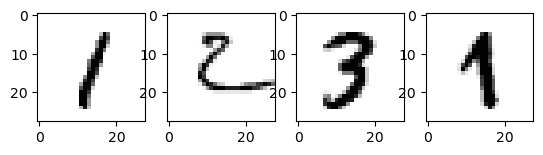

In [35]:
plt.figure()
f, axarr = plt.subplots(1,4) 

for i in range(0,4):
  axarr[i].imshow(x_train[i,:,:],cmap='gray')

### Reshape matrices to 2D matrices in (rows,columns) format. 

- use pixel values as features.

In [7]:
x_train1=np.reshape(x_train,(60000,28*28))
x_test1=np.reshape(x_test,(10000,28*28))
print(x_train1.shape)
print(x_test1.shape)

(60000, 784)
(10000, 784)


## Save the 2D matrices in csv files.

In [8]:
np.savetxt('mnist_training.csv', x_train1, fmt='%d', delimiter=',') 
np.savetxt('mnist_testing.csv', x_test1, fmt='%d', delimiter=',') 
np.savetxt('mnist_train_class.csv', y_train_original, fmt='%d', delimiter=',') 
np.savetxt('mnist_test_class.csv', y_test_original, fmt='%d', delimiter=',') 

### Scaling Training and Testing data
If x_train and x_test are not already scaled between 0 and 1, scale it.

In [9]:
x_train1 = x_train1/255
x_test1 = x_test1/255
print(np.max(x_train1))
print(np.max(x_test1))
print(np.min(x_train1))
print(np.min(x_test1))

1.0
1.0
0.0
0.0


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

- Try different solver options if there is no convergence.
- Increase the tolerance value if optimization is not converging.

In [22]:
logit       = LogisticRegression(penalty=None,multi_class= 'multinomial',max_iter=500,solver='saga',tol=0.01,verbose=1,n_jobs=4) # no regularization as indicated by parameter penalty
model_logit = logit.fit(x_train1, y_train_original)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 41 epochs took 58 seconds


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   58.2s finished


In [23]:
def model_summary(model,x,y): #x = features, y = class label
    y_pred_prob = model.predict_proba(x) 
    # y_pred_prob = (n_samples,10)
    # y_pred_prob[:,i] = prob that belongs to class i

    y_pred_class =  np.argmax(y_pred_prob , axis=1)
    
    
    print('coef',model.coef_.shape) #coefficients
    print('intercept',model.intercept_.shape) #intercept
    print('accuracy ',accuracy_score(y,y_pred_class))
    print('Log loss/ -loglikelihood / cross-entropy loss', log_loss(y,y_pred_prob,normalize=True))

In [24]:
model_summary(model_logit,x_train1,y_train_original)

coef (10, 784)
intercept (10,)
accuracy  0.9343666666666667
Log loss/ -loglikelihood / cross-entropy loss 0.2388720070417901


In [25]:
model_summary(model_logit,x_test1,y_test_original)

coef (10, 784)
intercept (10,)
accuracy  0.9258
Log loss/ -loglikelihood / cross-entropy loss 0.2655256270734242


- There are 10 biases ($\beta_{0}$)
- There are 784*10 model weights

### Training using the one-vs-rest (OvR) scheme for multi class case

- set the `multi_class` option

In [17]:
logit_ovr       = LogisticRegression(penalty=None,multi_class='ovr',max_iter=500,solver='saga',tol=0.01,verbose=1,n_jobs=4) # no regularization as indicated by parameter penalty
model_logit_ovr = logit.fit(x_train1, y_train_original)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 40 epochs took 57 seconds


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   57.0s finished


#### Training set results

In [19]:
model_summary(model_logit_ovr,x_train1,y_train_original)

coef (10, 784)
intercept (10,)
accuracy  0.9340666666666667
Log loss/ -loglikelihood / cross-entropy loss 0.23916966132377132


#### Testing results

In [20]:
model_summary(model_logit_ovr,x_test1,y_test_original)

coef (10, 784)
intercept (10,)
accuracy  0.9257
Log loss/ -loglikelihood / cross-entropy loss 0.26535413944835656
